<a href="https://colab.research.google.com/github/keerthana-narra/global-terrorism/blob/main/N_Sai_Keerthana_Reddy_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

### Importing libraries, mounting drive, reading data set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Capstone project/Copy of Global Terrorism Data.csv',encoding='latin1'
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Taking subset of data by ignoring columns which dosent seem to be useful



In [136]:
#taking a subset because by looking at the data many columns have null values so not useful
global_terrorism = df[['eventid','iyear',	'imonth',	'iday', 'extended',	'country', 'country_txt',	
                       'region',	'region_txt',	'provstate',	'city',	'latitude',	'longitude', 'success',	
                       'suicide',	'attacktype1',	'attacktype1_txt', 'targtype1',	'targtype1_txt', 
                       'targsubtype1','targsubtype1_txt', 'gname','weaptype1', 'weaptype1_txt', 'nkill', 
                       'nwound',   'ishostkid', 'target1',  'ransom']]

In [137]:
global_terrorism.head()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,gname,weaptype1,weaptype1_txt,nkill,nwound,ishostkid,target1,ransom
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Unknown,1.0,0.0,0.0,Julio Guzman,0.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,Unknown,0.0,0.0,1.0,"Nadine Chaval, daughter",1.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Unknown,13,Unknown,1.0,0.0,0.0,Employee,0.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,6,Explosives,NaN,NaN,0.0,U.S. Embassy,0.0
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,8,Incendiary,NaN,NaN,0.0,U.S. Consulate,0.0


###Re-naming columns

In [139]:
#renaming the columns by the appropriate name
global_terrorism.rename(columns={'iyear' : 'year' , 'imonth' : 'month', 'iday' : 'day' , 'country_txt' : 'country_name' , 
                                 'region_txt' : 'region_name' ,  'attacktype1_txt' : 'attacktype' , 'target1' : 'target' , 
                                 'nkill' : 'killed' , 'nwound' : 'wounded'  , 'gname' : 'group' , 'targtype1_txt' : 'target_type' , 
                                 'weaptype1_txt' : 'weapon_type' , 'motive' : 'motive' } , inplace = True)
#Introducing new column
global_terrorism['casualities'] = global_terrorism.killed + global_terrorism.wounded
# taking data frame subset into global_terrorism variable
global_terrorism=global_terrorism[[ 'year' , 'month' , 'day' , 'country', 'country_name' ,'region','region_name' , 'city' ,
                                   'latitude' , 'longitude' ,  'attacktype' , 'killed' , 'wounded' , 'casualities' , 'target' , 
                                   'group' , 'target_type' , 'weapon_type' ]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# total no.of years terrorist attacks recorded
print('no.of years terrorist attacks recorded:',global_terrorism.index.nunique())
# total no.of people got killed
print('no.of people got killed:',int(global_terrorism.killed.sum()))
# total no.of people wounded
print('no.of people wounded',int(global_terrorism.wounded.sum()))

no.of years terrorist attacks recorded: 181691
no.of people got killed: 411868
no.of people wounded 523869


### Visualizing data - plots on year-wise, country-wise, region-wise data and group-wise



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


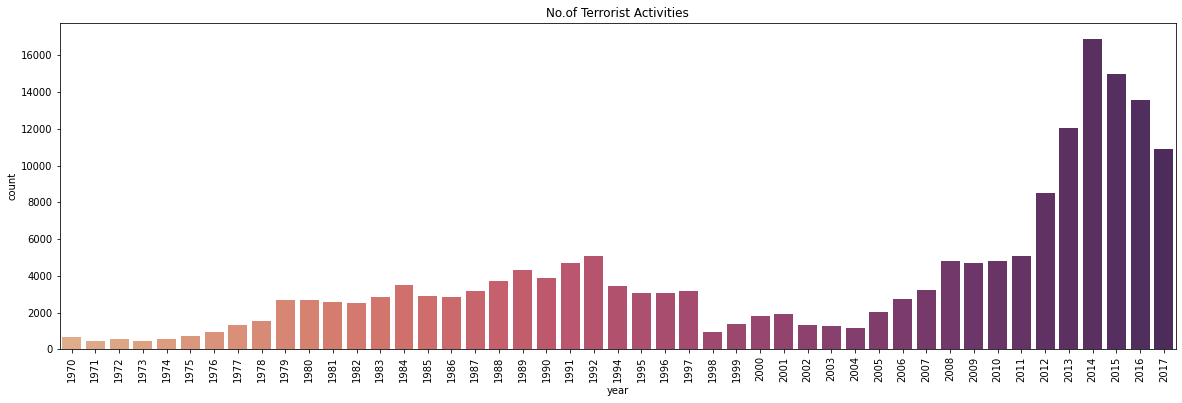

In [ ]:
#Visualizing no.of terrorist activities happend from 1970-2017 (Year-wise)

plt.subplots(figsize=(20,6))   # for size of the rectangle the plot should appear length,breadth
sns.countplot('year',data=global_terrorism,palette='flare') 
plt.xticks(rotation=90) # rotates the year value
plt.title('No.of Terrorist Activities') # title
plt.show()


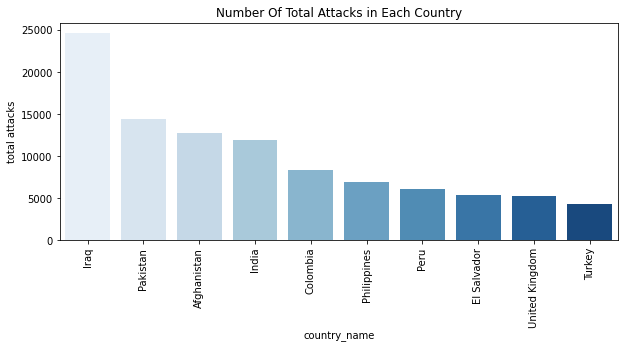

In [ ]:
# Visualizing Top 10 countries in total no.of attacks (Country-wise)
plt.subplots(figsize=(10,4))   # for size of the rectangle the plot should appear length,breadth
country_attacks = global_terrorism.country_name.value_counts()[:10].reset_index() # counting attacks and slicing upto first 10

country_attacks.columns = ['country_name', 'total attacks'] # names of x and y axis
sns.barplot(x=country_attacks.country_name, y=country_attacks['total attacks'], palette= 'Blues')

plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Country')
plt.show()


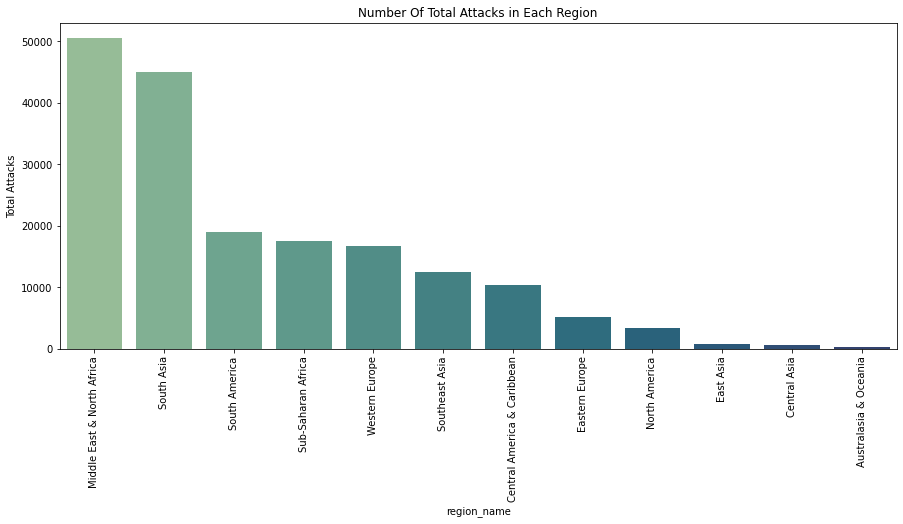

In [ ]:
## Visualizing attacks in regions (region-wise)
region_attacks = global_terrorism.region_name.value_counts().to_frame().reset_index()
region_attacks.columns = ['region_name', 'Total Attacks']

plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.region_name, y=region_attacks['Total Attacks'], palette='crest')
plt.xticks(rotation=90)

plt.title('Number Of Total Attacks in Each Region')
plt.show()

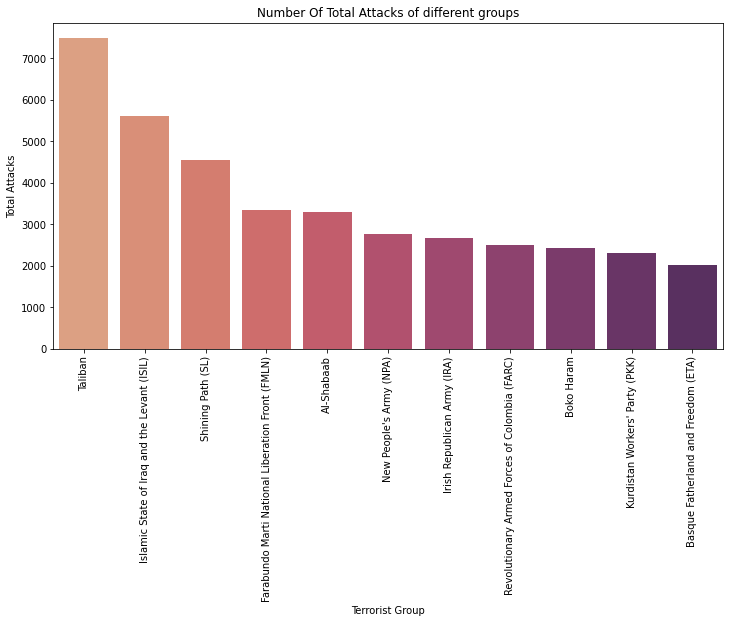

In [ ]:
# taking a subset of attacks based on terrorist groups
group_attacks = global_terrorism.group.value_counts().to_frame().drop('Unknown').reset_index()[:11]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']

# plotting bar graph 
plt.subplots(figsize=(12,6))
sns.barplot(x=group_attacks['Terrorist Group'], y=group_attacks['Total Attacks'], palette='flare')

plt.xticks(rotation=90)
plt.title('Number Of Total Attacks of different groups')
plt.show()

# Note : There are some unknown group attacks.

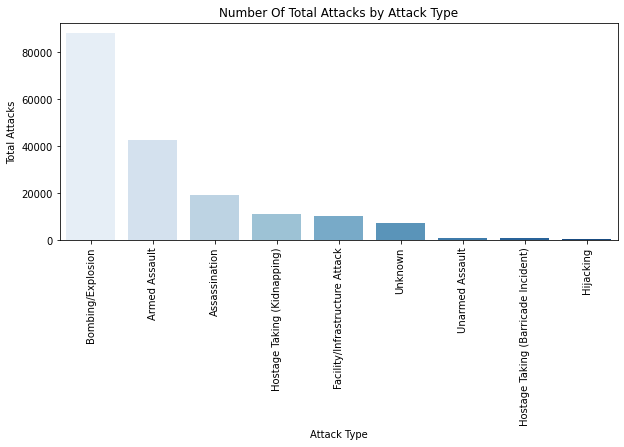

In [ ]:
# Visualizing no.of attacks done by attack-type
attack_type = global_terrorism.attacktype.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(10,4))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='Blues')
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

In [ ]:
attack_type

,Attack Type,Total Attacks
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


### Analysis of 2014 - most terrorist attacks recorded

In [ ]:
# Setting index value to year
global_terrorism.set_index('year', inplace = True)

In [124]:
in_2014 = global_terrorism.loc[2014]
in_2014.head()

,month,day,country,country_name,region,region_name,city,latitude,longitude,attacktype,killed,wounded,casualities,target,group,target_type,weapon_type
year,,,,,,,,,,,,,,,,,
2014,1,1,45,Colombia,3,South America,Convencion,8.868790,-73.194094,Bombing/Explosion,0.0,0.0,0.0,Crude Oil Holding Pools,National Liberation Army of Colombia (ELN),Utilities,Explosives
2014,1,1,182,Somalia,11,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Bombing/Explosion,4.0,20.0,24.0,Hotel,Al-Shabaab,Business,Explosives
2014,1,1,153,Pakistan,6,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,3.0,31.0,34.0,Shia Pilgrims,Jaish-e-Islam,Private Citizens & Property,Explosives
2014,1,1,153,Pakistan,6,South Asia,Dera Bugti,29.034412,69.158661,Bombing/Explosion,0.0,0.0,0.0,Unknown,Unknown,Unknown,Explosives
2014,1,1,182,Somalia,11,Sub-Saharan Africa,Buale,1.097128,42.598368,Hostage Taking (Kidnapping),NaN,NaN,NaN,Aid Workers,Al-Shabaab,NGO,Unknown


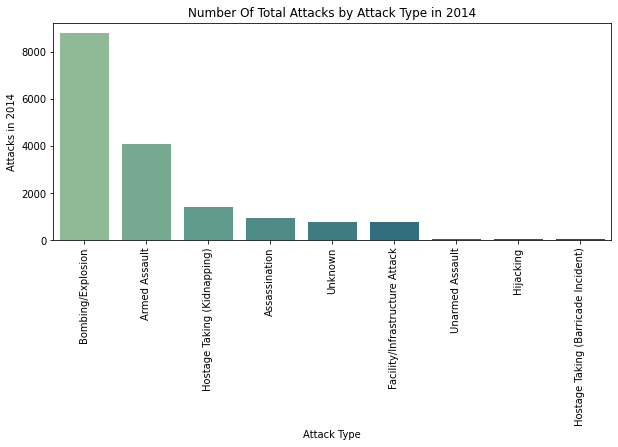

In [125]:
# Attacks in 2014 by attack type
attacks_in_2014 = in_2014.attacktype.value_counts().to_frame().reset_index()
attacks_in_2014.columns = ['Attack Type', 'Attacks in 2014']
plt.subplots(figsize=(10,4))
sns.barplot(x=attacks_in_2014['Attack Type'], y=attacks_in_2014['Attacks in 2014'], palette='crest')
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type in 2014')
plt.show()

In [126]:
attacks_in_2014

,Attack Type,Attacks in 2014
0,Bombing/Explosion,8799
1,Armed Assault,4071
2,Hostage Taking (Kidnapping),1397
3,Assassination,920
4,Unknown,784
5,Facility/Infrastructure Attack,783
6,Unarmed Assault,54
7,Hijacking,49
8,Hostage Taking (Barricade Incident),46
